# Clustering

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris') 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


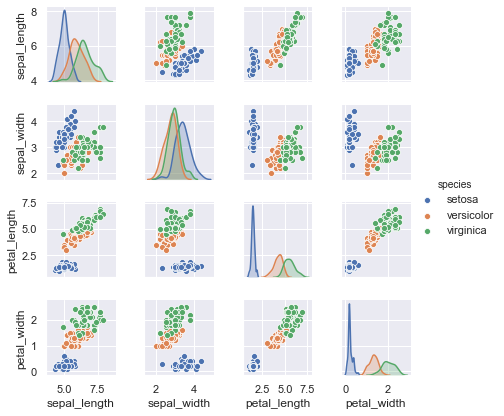

In [2]:
%matplotlib inline
# sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [5]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']
X_iris.shape, y_iris.shape

((150, 4), (150,))

In [9]:
from sklearn.mixture import GaussianMixture # 1. Choose the model class 
model = GaussianMixture(n_components=3, covariance_type='full') # 2. Instantiate the model w/ hyperparameters 
model.fit(X_iris) # 3. Fit to data. Notice y is not specified! 
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

In [11]:
iris['cluster'] = y_gmm
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


## introduce PCA to visualize

In [14]:
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

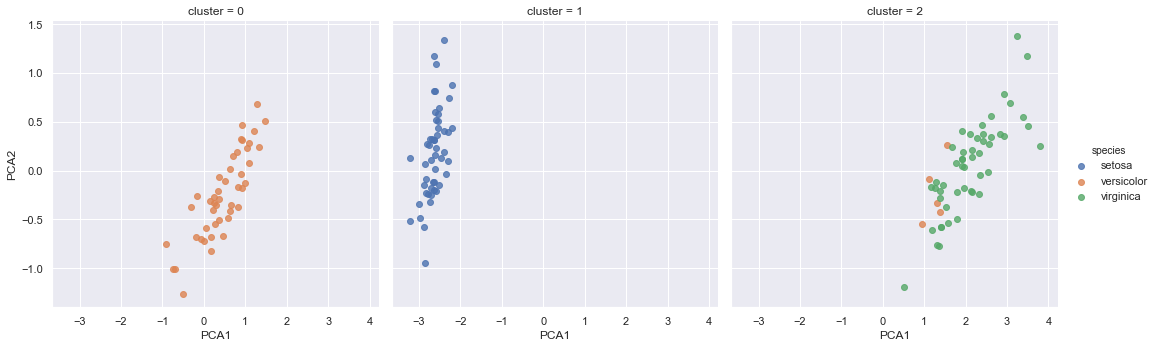

In [15]:
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)